# **Case Study - Spam Detection**

The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP) for a Text Classification problem.

We will follow the steps mentioned below:

1. Load the Given Data
2. Exploratory Data Analysis
3. Segregate the Inputs and Output
4. Split the data into Training and Testing Data
5. **Data Transformation -** Apply data preparation on the `Training Data`
    - Text Preprocessing (special characters, stop words, lower case, stemming, etc)
    - Text Vectorization - Converting text to numerical vector using Bag of Words
6. **Model Building -** Build the Model on Processed Train Data
7. **Data Preparation -** Apply data preparation on the Testing Data
8. **Prediction on Test Data -** Use the trained model to predict on test data
9. **Evaluation -** Calculate the score of model by matching model's prediction with actual values

**Major Steps Involved:**
1. **Text Data Visualisation**
2. **Text Data Preprocessing**
3. **Text Data Vectorization - Text To Numerical Representation using Bag of Words**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **Step 1 - Load the Data**

In [2]:
df = pd.read_csv('data/email_data.csv')

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## **Step 2 - Exploratory Data Analysis**

In [3]:
df.shape

(5171, 4)

### **2.a. Explore the Data Distribution of Target Variable**

In [4]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [5]:
df['label'].value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

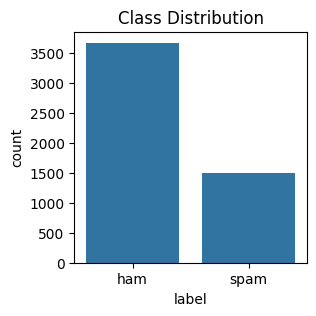

In [6]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Class Distribution")
sns.countplot(data=df, x='label')

plt.show()

### **2.b. Visualizing the distribution of most frequent words**

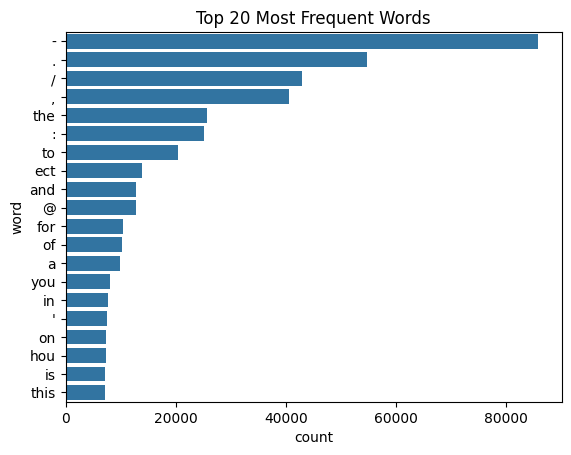

In [7]:
from collections import Counter

# Get all words in the text
all_words = " ".join(df['text'].values).split()
word_counts = Counter(all_words)

# Get the most common words
common_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
sns.barplot(data=common_words_df, x='count', y='word')
plt.title('Top 20 Most Frequent Words')
plt.show()

### **2.c. Classwise WordCloud - Explore the Relationships between each pair of Inputs and Output**

In [9]:
# ! pip install wordcloud

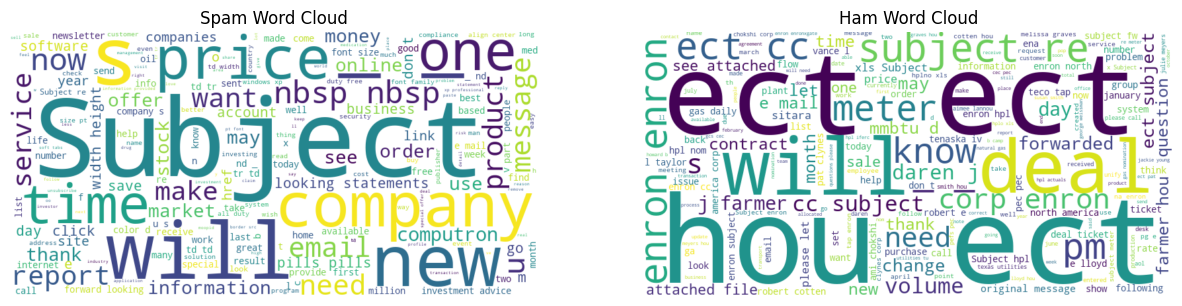

In [10]:
from wordcloud import WordCloud

# Word cloud for spam messages
spam_text = " ".join(df[df['label'] == 'spam']['text'].values)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Word cloud for ham messages
ham_text = " ".join(df[df['label'] == 'ham']['text'].values)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display the word clouds
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(spam_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Spam Word Cloud')
ax[1].imshow(ham_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Ham Word Cloud')
plt.show()

**Observations**
1. There is a clear need to preprocess the text data as most of the most frequent tokens are special characters and punctuations (i.e. cleaning).
2. There are words like 'Subject', 'ect', 'hou', 'eron', 'message', etc... which looks dominating.

## **Data Preparation and Model Building Pipeline**

1. Segregate the Inputs (X) and Output (y)
2. Split into train and test (X_train, X_test, y_train, y_test)
3. Data Preparation: Data Cleaning and Feature Engineering.
    - Clean the training data
    - Preprocess the training data (X_train_transformed)
4. Training Phase: Build a model
5. Preprocess the test data (X_test_transformed)
6. Predict on unseen data
7. Evaluate the model performance



## **Step 3 - Segregate Inputs (X) and Output (y)**

In [11]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
y = df["label"]
X = df[["text"]]

## **Step 4 - Split the data into Train and Test**

In [13]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4136, 1) (4136,)
(1035, 1) (1035,)


## **Step 5 - Apply Data Preparation on Training Data**

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean(doc): 
    # doc is a string of text
    
    # Let's define a regex to match special characters and digits
    regex = "[^a-zA-Z.]"
    doc = re.sub(regex, " ", doc)

    # Convert to lowercase
    doc = doc.lower()
        
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Stop word removal
    stop_words = list(set(stopwords.words('english')))
    custom_stop_words = ['subject', 'ect', 'hou', 'message', 'enron', 'nbsp']
    stop_words = stop_words + custom_stop_words
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join and return
    return " ".join(lemmatized_tokens)

In [18]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectoriezer
bow_vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_transformed = bow_vect.fit_transform(X_train['text'])

print()
print(f"Shape of X_train_transformed (# of docs, # of unique vocabulary): {X_train_transformed.shape}")
print(f"Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): {type(X_train_transformed)}")

CPU times: total: 8.42 s
Wall time: 8.59 s

Shape of X_train_transformed (# of docs, # of unique vocabulary): (4136, 38687)
Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>


In [19]:
X_train_transformed

<4136x38687 sparse matrix of type '<class 'numpy.int64'>'
	with 245517 stored elements in Compressed Sparse Row format>

#### **Question: Should you convert the Sparse representation to Numpy Array or DataFrame before Modeling? 🤔**

In [20]:
print(X_train_transformed.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
from sys import getsizeof

print(f"Type of X_train_transformed: {type(X_train_transformed)}")
print(f"Size occupied by X_train_transformed in Memory: {getsizeof(X_train_transformed)} Bytes")

Type of X_train_transformed: <class 'scipy.sparse._csr.csr_matrix'>
Size occupied by X_train_transformed in Memory: 48 Bytes


In [22]:
from sys import getsizeof

# Converting sparse matrix to numpy array
X_train_transformed_arr = X_train_transformed.toarray()

print(f"Type of X_train_transformed_arr: {type(X_train_transformed_arr)}")
print(f"Size occupied by X_train_transformed_arr in Memory: {getsizeof(X_train_transformed_arr)} Bytes")

Type of X_train_transformed_arr: <class 'numpy.ndarray'>
Size occupied by X_train_transformed_arr in Memory: 1280075584 Bytes


## **🙄🤯😱**

#### **Question: How can I visualize the impact of the above text cleaning process?**

In [15]:
# !pip install tqdm

In [16]:
from tqdm import tqdm, tqdm_notebook

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
X_train['clean_text'] = X_train['text'].progress_apply(lambda doc: clean(doc))

X_train.head()

100%|█████████████████████████████████████████████████████████████████████████████| 4136/4136 [00:09<00:00, 423.27it/s]


,text,clean_text
5132,Subject: april activity surveys\r\nwe are star...,april activity survey starting collect data ap...
2067,Subject: message subject\r\nhey i ' am julie ^...,hey julie . turned high school senior houston ...
4716,Subject: txu fuels / sds nomination for may 20...,txu fuel sd nomination may attached may nomina...
4710,Subject: re : richardson volumes nov 99 and de...,richardson volume nov dec meter nick sure happ...
2268,Subject: a new era of online medical care .\r\...,new era online medical care . new era online m...


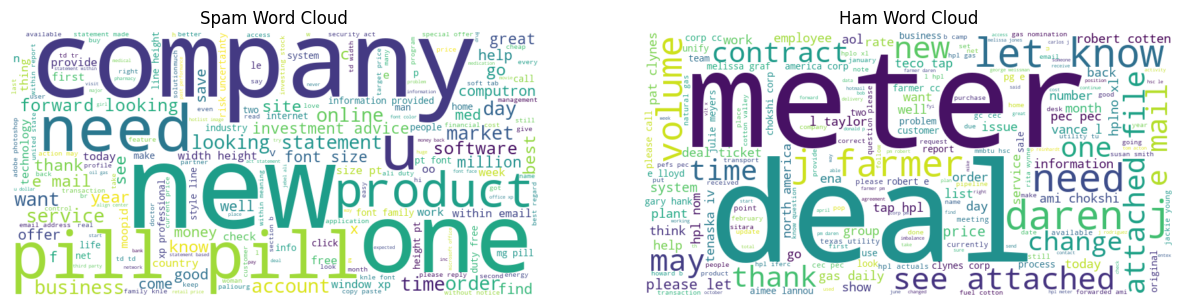

In [17]:
# Word cloud for spam messages
spam_text = " ".join(X_train[y_train == 'spam']['clean_text'].values)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Word cloud for ham messages
ham_text = " ".join(X_train[y_train == 'ham']['clean_text'].values)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display the word clouds
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(spam_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Spam Word Cloud')
ax[1].imshow(ham_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Ham Word Cloud')
plt.show()

## **Step 7 - Apply Data Preparation on Test Data**

**Note that, Step-6 is discussed after this.**

In [23]:
X_test_transformed = bow_vect.transform(X_test['text'])

print(f"Shape of X_test_transformed: {X_test_transformed.shape}")

Shape of X_test_transformed: (1035, 38687)


## **Step 6, 8 and 9 - Training and Testing Phase**

### **a. Naive Bayes**

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Building the Model
classifier = MultinomialNB() 
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 15.6 ms
Wall time: 11 ms

Model's Accuracy: 0.9748792270531401


### **b. Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Building the Model
classifier = LogisticRegression()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 469 ms
Wall time: 486 ms

Model's Accuracy: 0.9797101449275363


## **c. Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Building the Model
classifier = DecisionTreeClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 3.14 s
Wall time: 3.23 s

Model's Accuracy: 0.936231884057971


### **d. Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Building the Model
classifier = RandomForestClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 11.4 s
Wall time: 11.6 s

Model's Accuracy: 0.9739130434782609
